In [1]:
import json
import os
import cv2
import random
import glob
import torch

import numpy as np

from skimage import io # for io.imread
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib import colors # ploting

In [2]:
def imshow(images, titles, nrows = 0, ncols=0, figsize = (15,20)):
    """Plot a multiple images with titles.

    Parameters
    ----------
    images : image list
    titles : title list
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    if ncols == 0 and nrows == 0:
        ncols = len(images)
        nrows = 1
    if ncols == 0:
        ncols = len(images) // nrows
    if nrows == 0:
        nrows = len(images) // ncols

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, squeeze=False, figsize = figsize)
    for i, image in enumerate(images):
        axeslist.ravel()[i].imshow(image, cmap=plt.gray(), vmin=0, vmax=255)
        axeslist.ravel()[i].set_title(titles[i])
        axeslist.ravel()[i].set_axis_off()
    plt.tight_layout() # optional

In [3]:
if not os.path.exists('./images'):
    os.mkdir('./images')
else:
    print('folder `images` is present, passing')

!wget https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example1_1.jpeg
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example1_2.jpeg
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example2_1.jpeg
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example2_2.jpeg
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example3_1.jpeg
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example3_2.jpeg
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example4_1.jpeg
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example4_2.jpeg
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example5_1.jpeg
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example5_2.jpeg
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example6_1.jpeg
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example6_2.jpeg
!mv ./example*.jpeg images

--2025-04-16 11:21:17--  https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example1_1.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148445 (145K) [image/jpeg]
Saving to: ‘example1_1.jpeg’

example1_1.jpeg     100%[===================>] 144.97K   694KB/s    in 0.2s    

2025-04-16 11:21:18 (694 KB/s) - ‘example1_1.jpeg’ saved [148445/148445]

--2025-04-16 11:21:18--  https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/images/example1_2.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.19

In [4]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/keypoints_sift.json


--2025-04-16 11:21:38--  https://raw.githubusercontent.com/girafe-ai/ml-course/refs/heads/25s_ml_trainings_3/homeworks/hw03_panorama/keypoints_sift.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14936 (15K) [text/plain]
Saving to: ‘keypoints_sift.json’

keypoints_sift.json 100%[===================>]  14.59K  --.-KB/s    in 0.02s   

2025-04-16 11:21:38 (613 KB/s) - ‘keypoints_sift.json’ saved [14936/14936]



In [5]:
image_dict = {}

# Read all images and group them by prefix
for filename in sorted(glob.glob('./images/*.jpeg')):
    name = os.path.basename(filename)
    prefix = name.split('_')[0]  # Get prefix before first underscore

    # Load the image
    img = io.imread(filename)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Add to dictionary
    if prefix in image_dict:
        image_dict[prefix].append((img))
    else:
        image_dict[prefix] = [(img)]

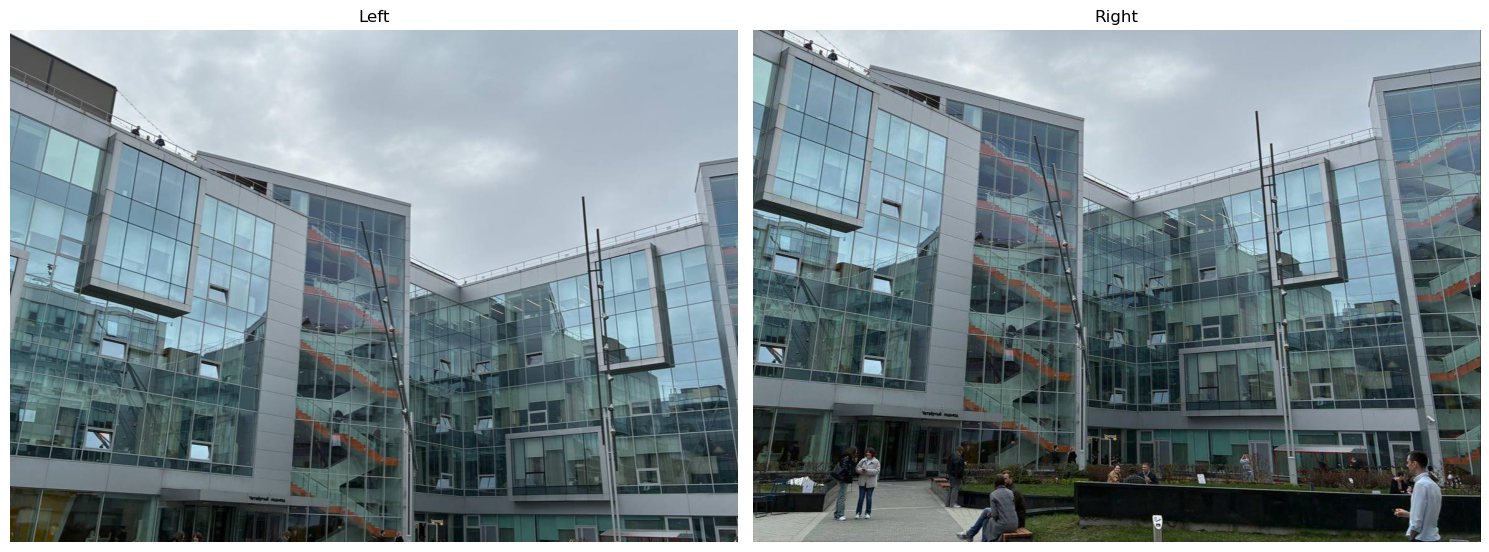

In [6]:
image1, image2 = image_dict['example2']
imshow( [image1, image2], ['Left', 'Right'])

In [8]:
print(f"first image shape: {image1.shape}, second image shape: {image2.shape}")

first image shape: (822, 1169, 3), second image shape: (822, 1167, 3)


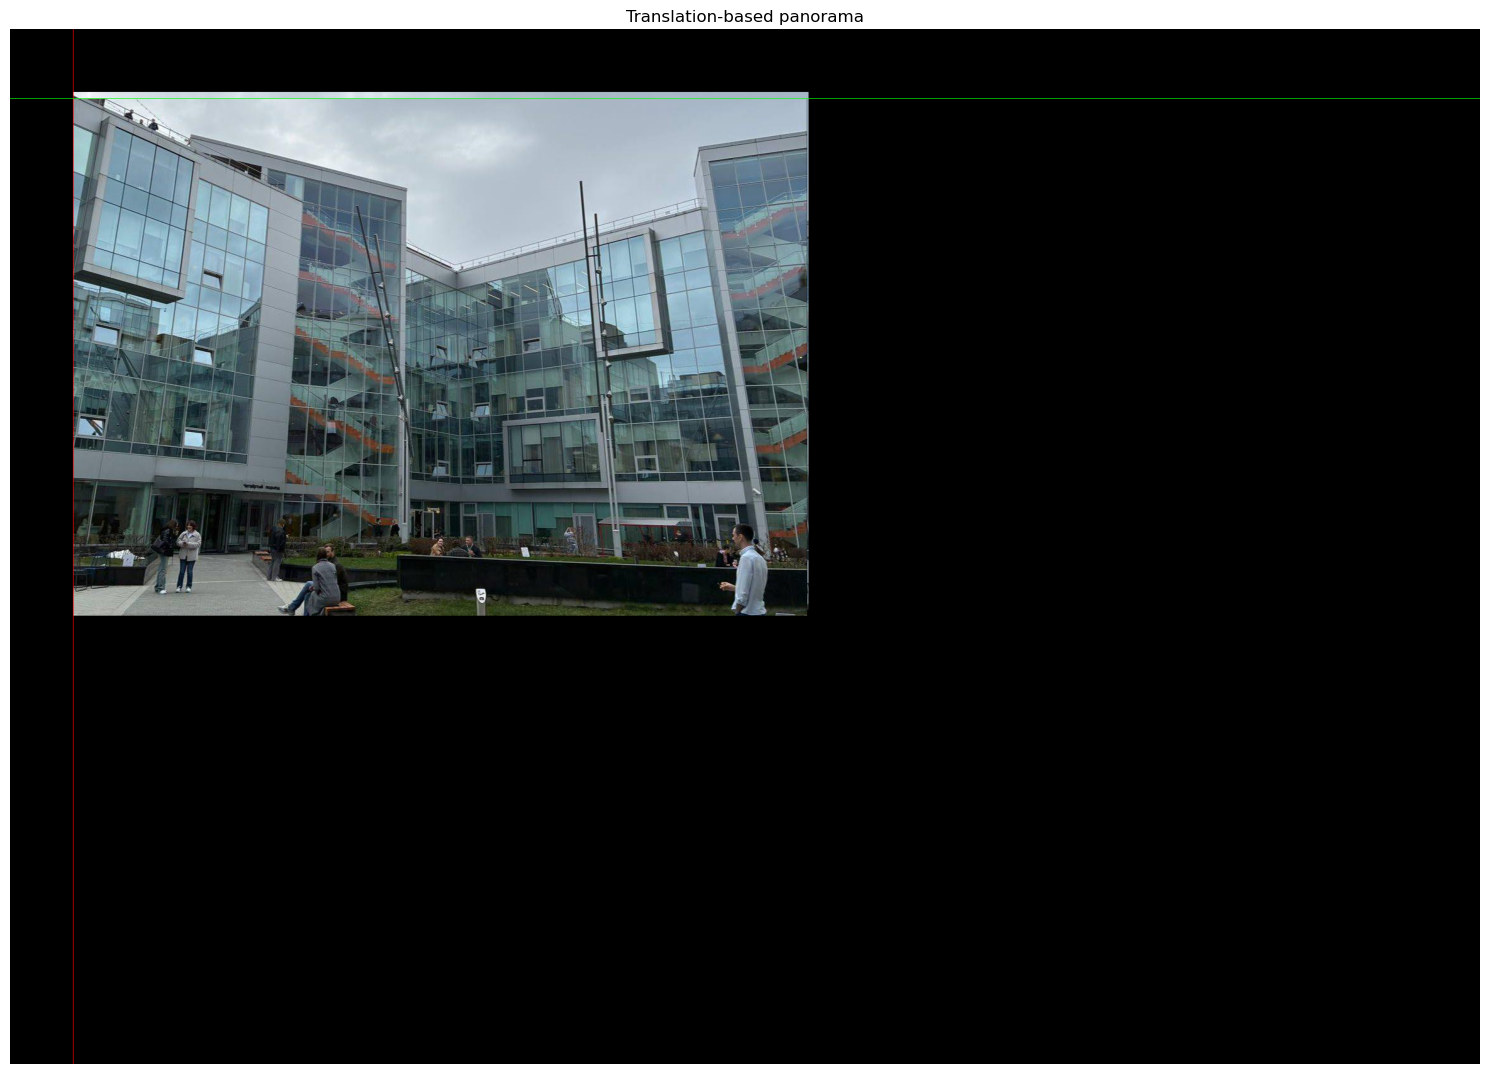

In [10]:
X_SHIFT = 100
Y_SHIFT = 100 # so you can have negative tx and ty 
tx = 0 # YOUR CODE HERE
ty = 10 # YOUR CODE HERE

assert tx + X_SHIFT >= 0
assert ty + Y_SHIFT >= 0

size = (image1.shape[0] + image2.shape[0], image1.shape[1] + image2.shape[1], 3)
image_trans = np.uint8(np.zeros(size))

# put image 1 on resulting image
image_trans[Y_SHIFT:Y_SHIFT+image1.shape[0], X_SHIFT:X_SHIFT+image1.shape[1], :] = image1

# put image 2 on resulting image
image_trans[Y_SHIFT+ty:Y_SHIFT+ty+image2.shape[0], X_SHIFT+tx:X_SHIFT+tx+image2.shape[1], :] = image2

# #add vertical line where two images are joined, use red color
image_trans[:, X_SHIFT+tx, :] = [255, 0, 0]
image_trans[Y_SHIFT+ty, :, :] = [0, 255, 0]

imshow( [image_trans], ['Translation-based panorama'])